# IMPORT STATEMENTS

In [1]:
# """bkim0787@umd.edu, jgerig@umd.edu, gmajchrz@umd.edu"""
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix, parallel_coordinates
import random
import math
import numpy as np
from numpy import array
from pandas.plotting import scatter_matrix
import seaborn as sns
import squarify
from sklearn.cluster import KMeans
from pylab import *
from numpy import *
from numpy.random import *
from scipy.cluster.vq import *
import plotly.express as px

# Read Excel file and combine sheets

In [2]:
pd.set_option('display.max_rows', 5)

In [3]:
df = pd.DataFrame()
data = pd.ExcelFile("Data Challenge Data Set Alumni Association.xlsx")
sheets = data.sheet_names

In [4]:
for sheet in sheets:               # loop through sheets inside an Excel file
    df_sheet = data.parse(sheet_name = sheet)
    df = df.append(df_sheet)

In [5]:
df.to_excel("combined_file.xlsx", index = False) # index kept false so that sheet index doesn't come
df.reset_index(drop = True, inplace = True) # reset index as it restarts from every sheet
df # sample view

Event Name Activity Code  \
0                              Ocean City Summer Party         PEZOC   
1    Neurodiversity on Campus and in the Workplace ...         PEAPC   
..                                                 ...           ...   
620                                  Terps on the Hill         PEZTH   
621                NY Terps Alumnae Networking Dinner          PEANA   

                         Activity Description Location Code  \
0              CP AAE-Ocean City Summer Party          PDES   
1                CP AA-Special Topics Webinar          POWE   
..                                        ...           ...   
620                  CP AAE-Terps on the Hill          PDDC   
621  CP AA-NY Terps Alumnae Networking Dinner          PNNY   

       Location Description Group Code      Group Description Event Date  \
0      CP DMV-Eastern Shore        PS9      CP Social-General 2019-07-06   
1         CP Online-Webinar        PC9      CP ProDev-General 2019-07-10   
..                      ...        ...                    ...        ...   
620   CP DMV- Washington DC        PD9  CP Advocacy- General  2014-06-12   
621  CP Northeast- New York        PCW     CP ProDev- Alumnae 2014-06-24   

     Participated  Average Age  First Time Attendees  \
0              63           52                     5   
1               7           56                     1   
..            ...          ...                   ...   
620           118           34                     0   
621            44           41                     0   

     Percentage First Time Attendees  Major Prospects  \
0                           0.079365               12   
1                           0.142857                0   
..                               ...              ...   
620                         0.000000               16   
621                         0.000000                9   

     Percentage Major Prospect  
0                     0.190476  
1                     0.000000  
..                         ...  
620                   0.135593  
621                   0.204545  

[622 rows x 14 columns]

# Data Information

In [6]:
df.info() # data type and some basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 622 entries, 0 to 621
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Event Name                       622 non-null    object        
 1   Activity Code                    622 non-null    object        
 2   Activity Description             622 non-null    object        
 3   Location Code                    622 non-null    object        
 4   Location Description             622 non-null    object        
 5   Group Code                       622 non-null    object        
 6   Group Description                622 non-null    object        
 7   Event Date                       622 non-null    datetime64[ns]
 8   Participated                     622 non-null    int64         
 9   Average Age                      622 non-null    int64         
 10  First Time Attendees             622 non-null    int64        

In [7]:
df.describe() # statistical measures

Participated  Average Age  First Time Attendees  \
count    622.000000   622.000000            622.000000   
mean      44.803859    40.117363             13.456592   
...             ...          ...                   ...   
75%       44.750000    46.000000             11.000000   
max     1657.000000    75.000000            702.000000   

       Percentage First Time Attendees  Major Prospects  \
count                       622.000000       622.000000   
mean                          0.276282         5.966238   
...                                ...              ...   
75%                           0.444444         5.000000   
max                           1.000000       131.000000   

       Percentage Major Prospect  
count                 622.000000  
mean                    0.102214  
...                          ...  
75%                     0.166667  
max                     0.818182  

[8 rows x 6 columns]

In [8]:
df.isna().sum() # shows no null values, so no need to treat null values

Event Name                   0
Activity Code                0
                            ..
Major Prospects              0
Percentage Major Prospect    0
Length: 14, dtype: int64

# Correlation Heat Map between Different Numeric Data Types

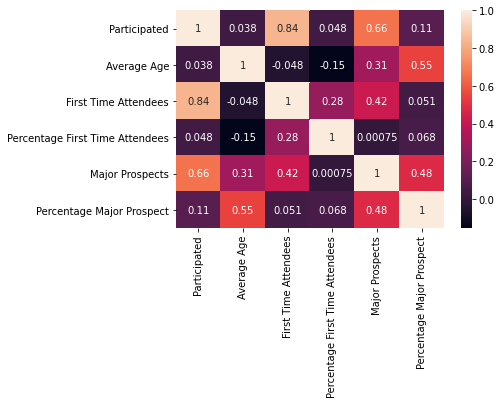

In [9]:
# plotting heat map with correlation between diff. numeric entries in the data set
%matplotlib inline
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot = True)

# Visual Representaion of Data

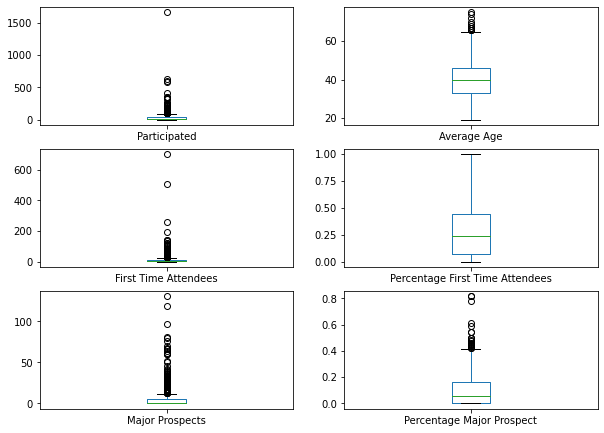

In [10]:
df.plot(kind='box',subplots=True,sharex=False,sharey=False, layout=(4,2), figsize = (10,10))
plt.show() # shows range and outliers

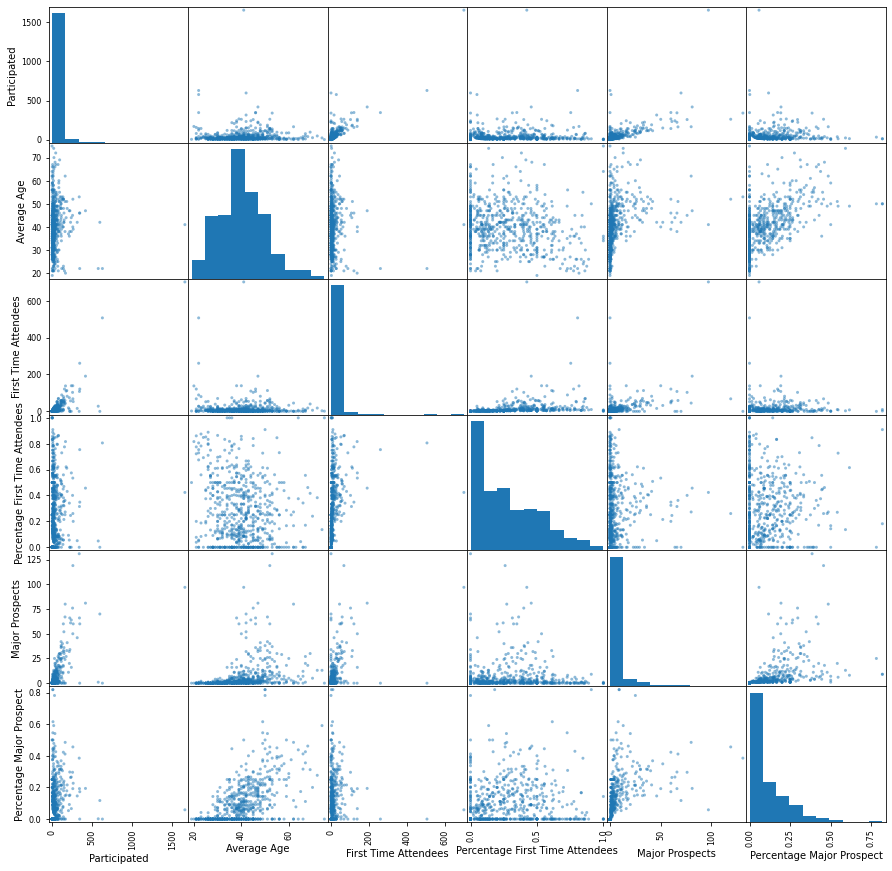

In [11]:
scatter_matrix(df,figsize = (15,15))
plt.show() # scatter plot of all numeric data w.r.t one another

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


<ipython-input-12-dc9cf45fb009>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax=ax) # plots according to that current axis


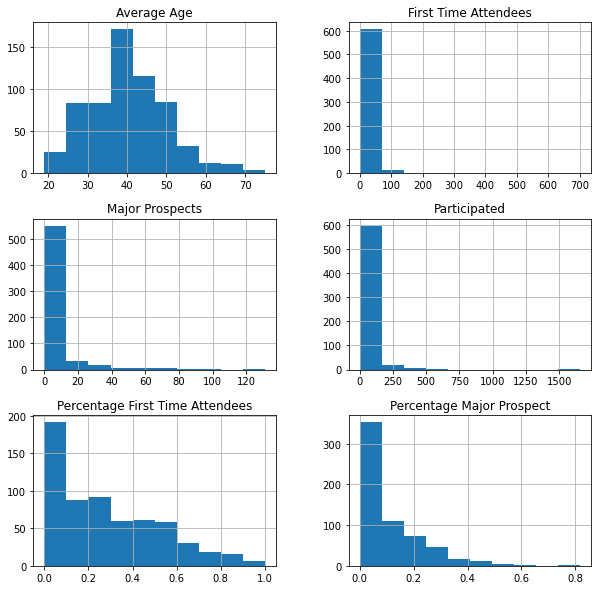

In [12]:
fig = plt.figure(figsize = (10,10))
print(plt.subplot(),plt.gca())
ax = plt.gca()# returns current axis
df.hist(ax=ax) # plots according to that current axis
plt.show()# imporved above histogram code for better visualisation

# Data Validation of Calculated fields

In [13]:
df['calc per 1st'] = df['First Time Attendees']/df['Participated']
df['calc per 1st'] == df['Percentage First Time Attendees']
count = sum(df['calc per 1st'] == df['Percentage First Time Attendees'])
print(count) # shows that Percentage First Time Attendees column is correct
del df['calc per 1st']

622


In [14]:
df['calc per major'] = df['Major Prospects']/df['Participated']
df['calc per major'] == df['Percentage Major Prospect']
count = sum(df['calc per major'] == df['Percentage Major Prospect'])
print(count )# shows calculated column is fine
del df['calc per major']

622


# Data Processing for Plots

In [15]:
newdf = df.copy(deep = True)

In [16]:
newdf['Activity Code'] = newdf['Activity Code'].str.replace(' ','')
#newdf['Activity Description'] = newdf['Activity Description'].str.replace('-','')
actTable = newdf.groupby('Activity Code').mean().reset_index()
actref = newdf.drop_duplicates(subset = 'Activity Code')
actTable = pd.merge(actTable , actref[['Activity Code','Activity Description']], on = 'Activity Code', how = 'left')
unique_activities = newdf['Activity Code'].unique()
print("Number of Unique activities are",len(unique_activities))

Number of Unique activities are 342


In [17]:
newdf['Group Code'] = newdf['Group Code'].str.replace(' ','')
#newdf['Group Code'] = newdf['Group Code'].str.replace('-','')
grpTable = newdf.groupby('Group Code').mean().reset_index()
grpref = newdf.drop_duplicates(subset = 'Group Code')
grpTable = pd.merge(grpTable , grpref[['Group Code','Group Description']], on = 'Group Code', how = 'left')
unique_groups = newdf['Group Code'].unique()
print("Number of Unique Groups are",len(unique_groups))

Number of Unique Groups are 50


In [18]:
newdf['Location Code'] = newdf['Location Code'].str.replace(' ','')
#newdf['Location Description'] = newdf['Location Description'].str.replace('-','')
locTable = newdf.groupby('Location Code').mean().reset_index()
locref = newdf.drop_duplicates(subset = 'Location Code')
locTable = pd.merge(locTable , locref[['Location Code','Location Description']], on = 'Location Code', how = 'left')
unique_loaction = newdf['Location Code'].unique()
print("Number of unique Locations are",len(unique_loaction))

Number of unique Locations are 46


# Plotting via Activities

In [19]:
#actTable = pd.pivot_table(df,index=['Activity Description']) # only the numeric fields with activity description

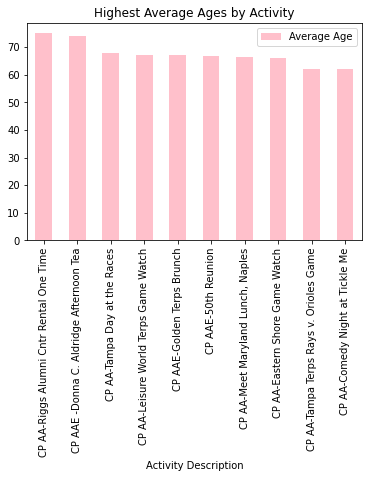

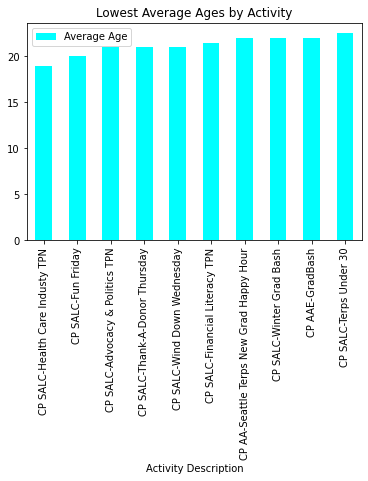

In [20]:
#Which activites have the highest average age?
top=actTable.nlargest(10,['Average Age']).reset_index()
del top['index']
top.plot(x = 'Activity Description', y = 'Average Age',kind='bar',color='pink', title='Highest Average Ages by Activity')
#Which activities have the lowest average age?
bottom=actTable.nsmallest(10,['Average Age']).reset_index()
del bottom['index']
if bottom['Average Age'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Activity Description', y = 'Average Age',kind='bar', color='cyan', title='Lowest Average Ages by Activity')

Percentage of participants Covered by Top 10 Activities is 27.24


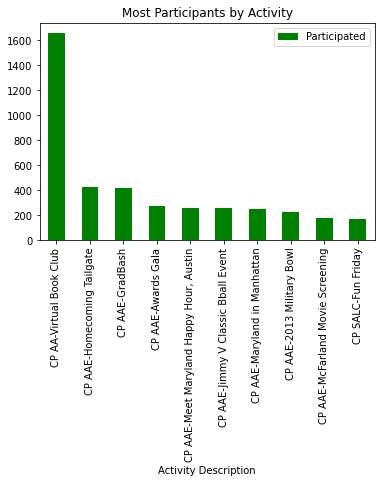

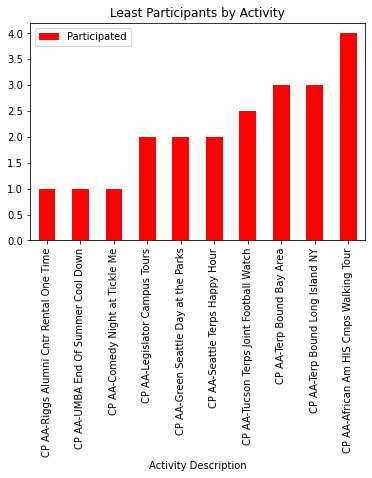

In [21]:
#Which activites have the highest number of partcipants?
top=actTable.nlargest(10,['Participated']).reset_index()
del top['index']
top.plot(y = 'Participated', x = 'Activity Description', kind='bar',color='green',title='Most Participants by Activity')
#Which activites have the lowest number of partcipants?
bottom = actTable.nsmallest(10,['Participated']).reset_index()
del bottom['index']
if bottom['Participated'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(y = 'Participated', x = 'Activity Description', kind='bar',color='red',title='Least Participants by Activity')
percentage = (sum(top['Participated'])/sum(actTable['Participated']))*100
print("Percentage of participants Covered by Top 10 Activities is %4.2f"%percentage)

Bottom 10 values are all 0
Percentage of Major Prospects Covered by Top 10 Activities is 24.94


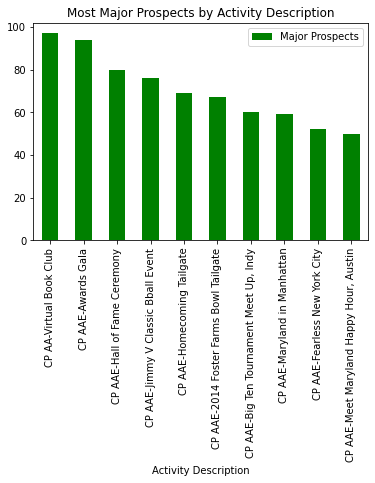

In [22]:
#Which activites have the highest number of Major Prospects?
topam = actTable.nlargest(10,['Major Prospects']).reset_index()
del topam['index']
topam.plot(x = 'Activity Description', y = 'Major Prospects', kind='bar',color='green',title='Most Major Prospects by Activity Description')
#Which activites have the least number of Major Prospects?
bottom=actTable.nsmallest(10,['Major Prospects']).reset_index()
del bottom['index']
if bottom['Major Prospects'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Activity Description', y = 'Major Prospects',kind='bar',color='red',title='Least Major Prospects by Activity')
percentage = (sum(top['Major Prospects'])/sum(actTable['Major Prospects']))*100
print("Percentage of Major Prospects Covered by Top 10 Activities is %4.2f"%percentage)

Bottom 10 values are all 0
Percentage of First Time Attendees Covered by Top 10 Activities is 32.94


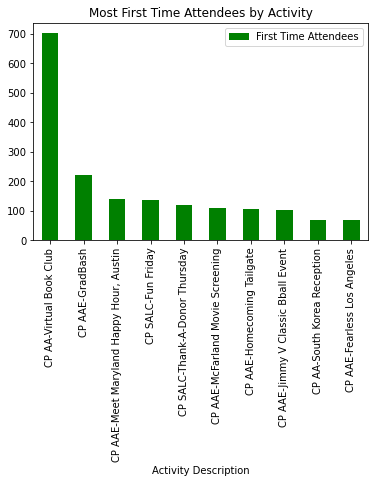

In [23]:
#Which activites have the highest number of First Time Attendees?
topaf=actTable.nlargest(10,['First Time Attendees']).reset_index()
del topaf['index']
topaf.plot(x = 'Activity Description', y = 'First Time Attendees', kind='bar',color='green',title='Most First Time Attendees by Activity')
#Which activites have the lowest number of First Time Attendees?
bottom=actTable.nsmallest(10,['First Time Attendees']).reset_index()
del bottom['index']
if bottom['First Time Attendees'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Activity Description', y = 'First Time Attendees',kind='bar',color='red',title='Least First Time Attendees by Activity')
percentage = (sum(top['First Time Attendees'])/sum(actTable['First Time Attendees']))*100
print("Percentage of First Time Attendees Covered by Top 10 Activities is %4.2f"%percentage)

# Plotting Via Groups

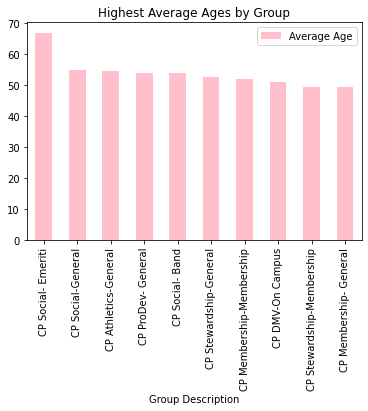

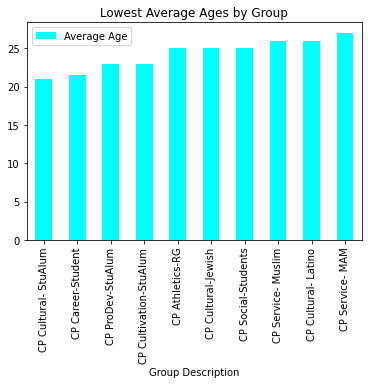

In [24]:
#Which groups have the highest average age?
top = grpTable.nlargest(10,['Average Age']).reset_index()
del top['index']
top.plot(y ='Average Age', x = 'Group Description', kind='bar',color='pink',title='Highest Average Ages by Group')
#Which groups have the lowest average age?
bottom=grpTable.nsmallest(10,['Average Age']).reset_index()
del bottom['index']
if bottom['Average Age'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Group Description', y = 'Average Age', kind='bar', color='cyan', title='Lowest Average Ages by Group')

Percentage of participants Covered by Top 10 Groups is 47.96


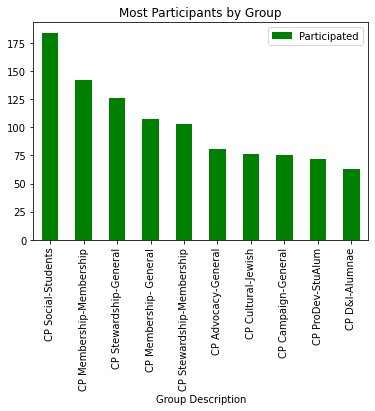

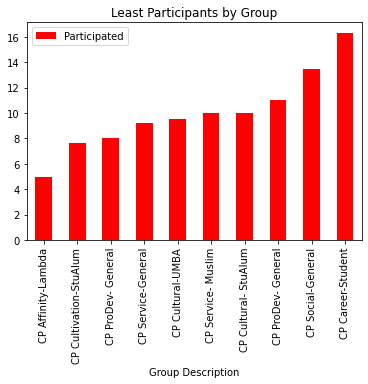

In [25]:
#Which groups have the highest number of partcipants?
top=grpTable.nlargest(10,['Participated']).reset_index()
del top['index']
top.plot(x = 'Group Description', y = 'Participated', kind='bar',color='green',title='Most Participants by Group')
#Which groups have the lowest number of partcipants?
bottom=grpTable.nsmallest(10,['Participated']).reset_index()
del bottom['index']
if bottom['Participated'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Group Description', y = 'Participated',kind='bar',color='red',title='Least Participants by Group')
percentage = (sum(top['Participated'])/sum(grpTable['Participated']))*100
print("Percentage of participants Covered by Top 10 Groups is %4.2f"%percentage)

Bottom 10 values are all 0
Percentage of Major Prospects Covered by Top 10 Groups is 55.41


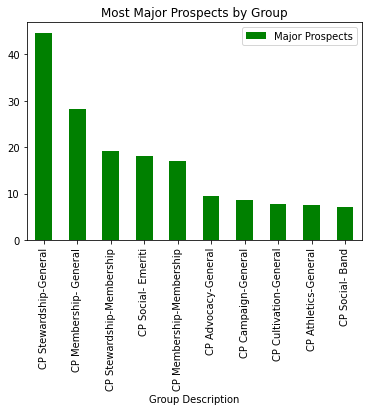

In [26]:
#Which groups have the highest number of Major Prospects?
topgm=grpTable.nlargest(10,['Major Prospects']).reset_index()
del topgm['index']
topgm.plot(x = 'Group Description', y = 'Major Prospects',kind='bar',color='green',title='Most Major Prospects by Group')
#Which groups have the least number of Major Prospects?
bottom=grpTable.nsmallest(10,['Major Prospects']).reset_index()
del bottom['index']
if bottom['Major Prospects'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Group Description', y = 'Major Prospects',kind='bar',color='red',title='Least Major Prospects by Group')
percentage = (sum(top['Major Prospects'])/sum(grpTable['Major Prospects']))*100
print("Percentage of Major Prospects Covered by Top 10 Groups is %4.2f"%percentage)

Percentage of First Time Attendees Covered by Top 10 Groups is 40.75


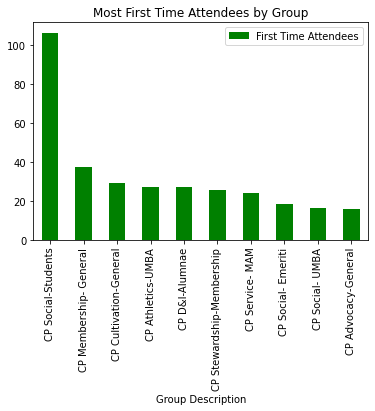

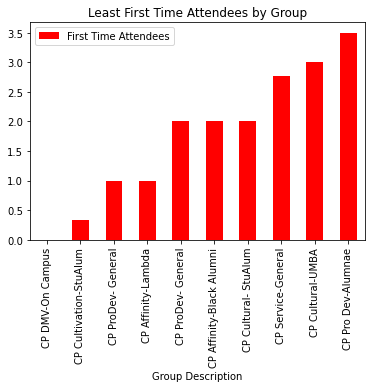

In [27]:
#Which groups have the highest number of First Time Attendees?
topgf=grpTable.nlargest(10,['First Time Attendees']).reset_index()
del topgf['index']
topgf.plot(x = 'Group Description', y = 'First Time Attendees',kind='bar',color='green',title='Most First Time Attendees by Group')
#Which groups have the lowest number of First Time Attendees?
bottom=grpTable.nsmallest(10,['First Time Attendees']).reset_index()
del bottom['index']
if bottom['First Time Attendees'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Group Description', y = 'First Time Attendees',kind='bar',color='red',title='Least First Time Attendees by Group')
percentage = (sum(top['First Time Attendees'])/sum(grpTable['First Time Attendees']))*100
print("Percentage of First Time Attendees Covered by Top 10 Groups is %4.2f"%percentage)

# Plotting Via Location

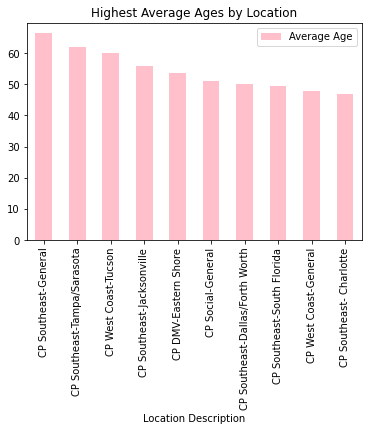

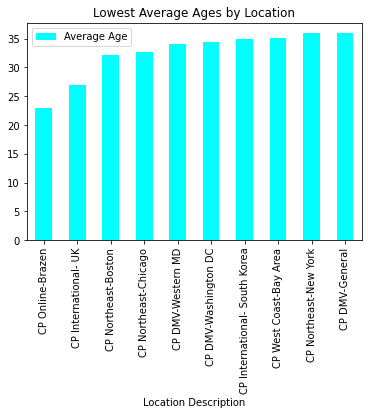

In [28]:
#Which locations have the highest average age?
top=locTable.nlargest(10,['Average Age']).reset_index()
del top['index']
top.plot(x = 'Location Description', y = 'Average Age', kind='bar',color='pink',title='Highest Average Ages by Location')
#Which locations have the lowest average age?
bottom=locTable.nsmallest(10,['Average Age']).reset_index()
del bottom['index']
if bottom['Average Age'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Location Description', y = 'Average Age',kind='bar', color='cyan', title='Lowest Average Ages by Location')

Percentage of participants Covered by Top 10 Locations is 51.69


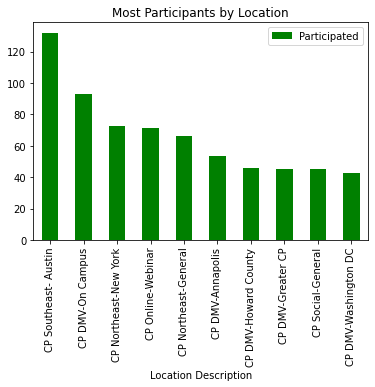

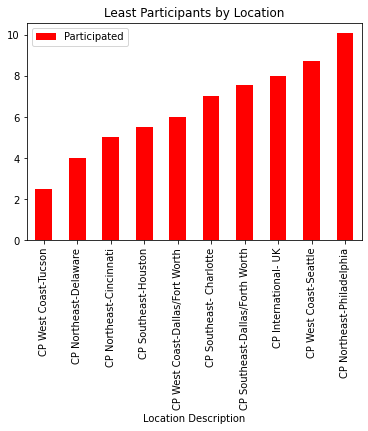

In [29]:
#Which locations have the highest number of partcipants?
top=locTable.nlargest(10,['Participated']).reset_index()
del top['index']
top.plot(x = 'Location Description', y = 'Participated',kind='bar',color='green',title='Most Participants by Location')
#Which locations have the lowest number of partcipants?
bottom=locTable.nsmallest(10,['Participated']).reset_index()
del bottom['index']
if bottom['Participated'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Location Description', y = 'Participated',kind='bar',color='red',title='Least Participants by Location')
percentage = (sum(top['Participated'])/sum(locTable['Participated']))*100
print("Percentage of participants Covered by Top 10 Locations is %4.2f"%percentage)

Percentage of Major Prospects Covered by Top 10 Locations is 55.27


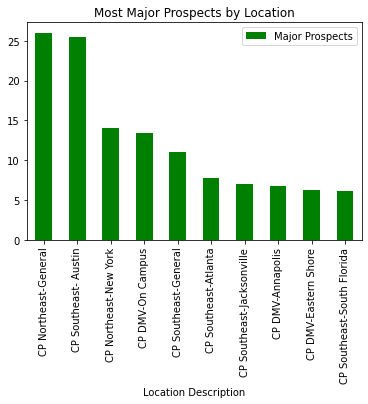

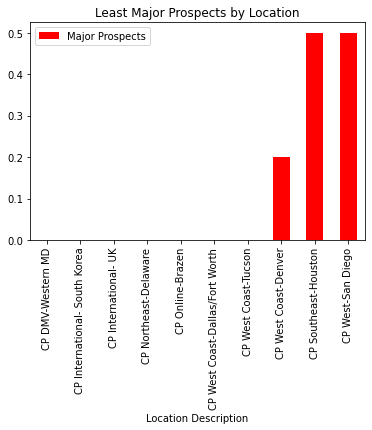

In [30]:
#Which locations have the highest number of Major Prospects?
toplm=locTable.nlargest(10,['Major Prospects']).reset_index()
del toplm['index']
toplm.plot(x = 'Location Description', y = 'Major Prospects',kind='bar',color='green',title='Most Major Prospects by Location')
#Which locations have the least number of Major Prospects?
bottom=locTable.nsmallest(10,['Major Prospects']).reset_index()
del bottom['index']
if bottom['Major Prospects'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Location Description', y = 'Major Prospects',kind='bar',color='red',title='Least Major Prospects by Location')
percentage = (sum(top['Major Prospects'])/sum(locTable['Major Prospects']))*100
print("Percentage of Major Prospects Covered by Top 10 Locations is %4.2f"%percentage)

Percentage of First Time Attendees Covered by Top 10 Locations is 50.86


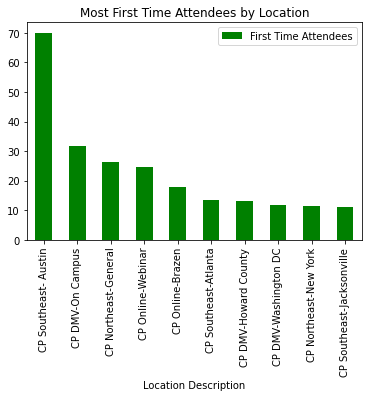

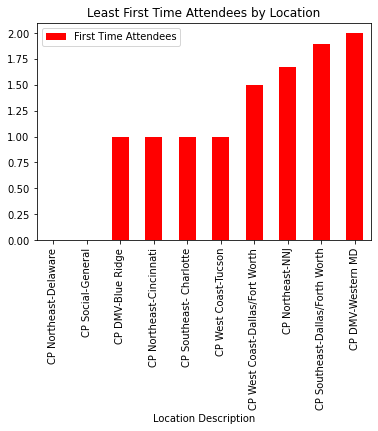

In [31]:
#Which locations have the highest number of First Time Attendees?
toplf=locTable.nlargest(10,['First Time Attendees']).reset_index()
del toplf['index']
toplf.plot(x = 'Location Description', y = 'First Time Attendees',kind='bar',color='green',title='Most First Time Attendees by Location')
#Which locations have the lowest number of First Time Attendees?
bottom=locTable.nsmallest(10,['First Time Attendees']).reset_index()
del bottom['index']
if bottom['First Time Attendees'].iloc[9] == 0:
    print("Bottom 10 values are all 0")
else:
    bottom.plot(x = 'Location Description', y = 'First Time Attendees',kind='bar',color='red',title='Least First Time Attendees by Location')
percentage = (sum(top['First Time Attendees'])/sum(locTable['First Time Attendees']))*100
print("Percentage of First Time Attendees Covered by Top 10 Locations is %4.2f"%percentage)

# Time Trend Analysis

In [32]:
df['Month'] = pd.DatetimeIndex(df['Event Date']).month
df['Month'] = pd.to_datetime(df['Month'], format='%m').dt.month_name().str.slice(stop=3)
timetrend = df.groupby('Month').mean().reset_index()
timetrend.sort_values(by=['Month'])
timetrend["Month"] = pd.to_datetime(timetrend.Month, format='%b', errors='coerce').dt.month
timetrend = timetrend.sort_values(by="Month")
timetrend['Month'] = pd.to_datetime(timetrend['Month'], format='%m').dt.month_name().str.slice(stop=3)
del df['Month']
timetrend.reset_index(drop = 'True')

Month  Participated  Average Age  First Time Attendees  \
0    Jan     31.555556    38.694444              7.722222   
1    Feb     31.393939    42.015152              8.787879   
..   ...           ...          ...                   ...   
10   Nov     35.242424    39.000000              9.454545   
11   Dec     46.648649    41.270270             13.189189   

    Percentage First Time Attendees  Major Prospects  \
0                          0.220042         2.444444   
1                          0.246439         4.681818   
..                              ...              ...   
10                         0.242773         4.454545   
11                         0.270686         8.243243   

    Percentage Major Prospect  
0                    0.058913  
1                    0.104440  
..                        ...  
10                   0.074028  
11                   0.110214  

[12 rows x 7 columns]

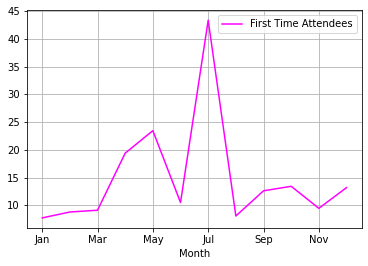

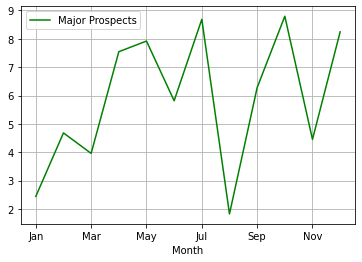

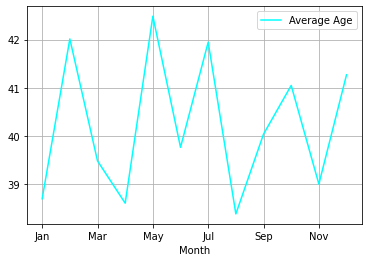

In [33]:
import plotly.express as px
timetrend.plot(x = 'Month', y = 'First Time Attendees', color = 'magenta', grid = True)
fig = px.scatter(timetrend, x=pd.to_datetime(timetrend.Month, format='%b', errors='coerce').dt.month, y="First Time Attendees", trendline="ols")
fig.show()
timetrend.plot(x = 'Month', y = 'Major Prospects', color  = 'green', grid = True)
fig = px.scatter(timetrend, x=pd.to_datetime(timetrend.Month, format='%b', errors='coerce').dt.month, y="Major Prospects", trendline="ols")
fig.show()
timetrend.plot(x = 'Month', y = 'Average Age', color = 'cyan', grid = True)
fig = px.scatter(timetrend, x=pd.to_datetime(timetrend.Month, format='%b', errors='coerce').dt.month, y="Average Age", trendline="ols")
fig.show()

# KNN Clustering

In [34]:
data= newdf.copy(deep = True)

In [35]:
for col in data.columns:
    if col == 'First Time Attendees' or col == 'Major Prospects':
        data[col]= data[col]/1.0
    else:
        del data[col]

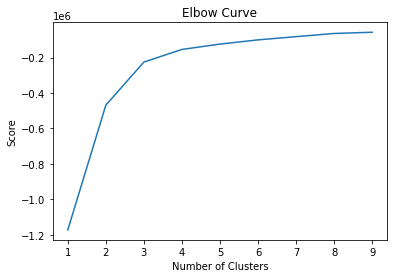

Text(0.5, 1.0, 'KNN Clustering')

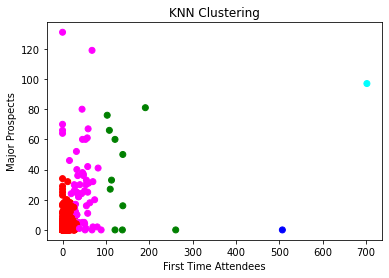

In [36]:
Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(data).score(data) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

model = KMeans(n_clusters = 5)
model.fit(data)
model.labels_
colormap = np.array(['Red', 'Blue', "Green", "cyan","Magenta"])
z = plt.scatter(data['First Time Attendees'], data['Major Prospects'], c = colormap[model.labels_])
plt.xlabel('First Time Attendees')
plt.ylabel('Major Prospects')
plt.title('KNN Clustering')

# Treemaps for Major Prospects

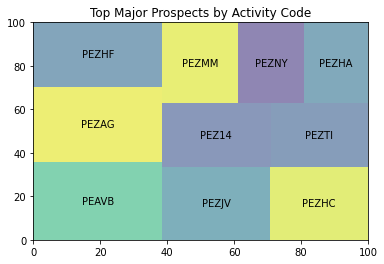

In [37]:
squarify.plot(sizes=topam['Major Prospects'], label=topam['Activity Code'], alpha=0.6 )
plt.title("Top Major Prospects by Activity Code")
plt.show()

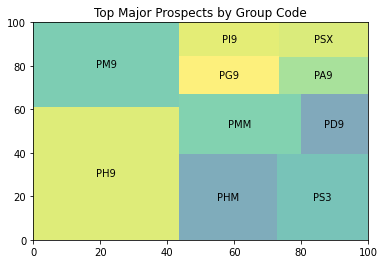

In [38]:
squarify.plot(sizes=topgm['Major Prospects'], label=topgm['Group Code'], alpha=0.6 )
plt.title("Top Major Prospects by Group Code")
plt.show()

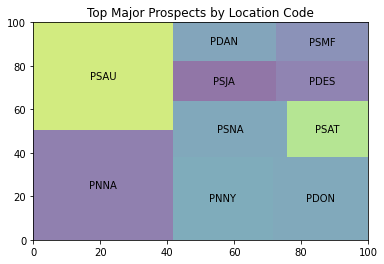

In [39]:
squarify.plot(sizes=toplm['Major Prospects'], label=toplm['Location Code'], alpha=0.6 )
plt.title("Top Major Prospects by Location Code")
plt.show()